Our goal is to predict weather by implementing machine learning model on time series dataset. The weather dataset is from a station at the Oakland International Airport. The data is from 1960 through 2021. Each row in the data represents one day, and the columns represent different weather measurements.

In [1]:
# Reading in the initial data
import pandas as pd
weather = pd.read_csv("local_weather.csv", index_col="DATE")

In [2]:
weather.head()

,STATION,NAME,ACMH,ACSH,AWND,DAPR,FMTM,FRGT,MDPR,PGTM,...,WT01,WT02,WT03,WT04,WT05,WT07,WT08,WT09,WT16,WT18
DATE,,,,,,,,,,,,,,,,,,,,,
1960-01-01,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-02,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
1960-01-03,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-04,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-05,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


In [3]:
# Check for null values
weather.isnull().sum()

STATION        0
NAME           0
ACMH       11015
ACSH       11015
AWND        8808
DAPR       16851
FMTM       14669
FRGT       16857
MDPR       16851
PGTM        8347
PRCP         281
SNOW        5479
SNWD        5355
TAVG       14822
TMAX           9
TMIN          10
TSUN       15708
WDF1       11015
WDF2        8807
WDF5        8894
WDFG       12592
WSF1       11015
WSF2        8806
WSF5        8894
WSFG       12592
WT01       13149
WT02       16526
WT03       16740
WT04       16855
WT05       16831
WT07       16857
WT08       13662
WT09       16857
WT16       14904
WT18       16856
dtype: int64

In [4]:
# Percentage of null values in each column
((weather.isnull().sum()/len(weather))*100).sort_values(ascending=False)

WT09       99.988137
FRGT       99.988137
WT07       99.988137
WT18       99.982205
WT04       99.976274
DAPR       99.952548
MDPR       99.952548
WT05       99.833917
WT03       99.294146
WT02       98.024794
TSUN       93.172786
WT16       88.403820
TAVG       87.917433
FMTM       87.009906
WT08       81.036835
WT01       77.993950
WDFG       74.690077
WSFG       74.690077
ACMH       65.336022
ACSH       65.336022
WDF1       65.336022
WSF1       65.336022
WDF5       52.755205
WSF5       52.755205
AWND       52.245092
WDF2       52.239160
WSF2       52.233229
PGTM       49.510647
SNOW       32.498962
SNWD       31.763450
PRCP        1.666766
TMIN        0.059315
TMAX        0.053384
NAME        0.000000
STATION     0.000000
dtype: float64

In [5]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16859 entries, 1960-01-01 to 2022-01-28
Data columns (total 35 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  16859 non-null  object 
 1   NAME     16859 non-null  object 
 2   ACMH     5844 non-null   float64
 3   ACSH     5844 non-null   float64
 4   AWND     8051 non-null   float64
 5   DAPR     8 non-null      float64
 6   FMTM     2190 non-null   float64
 7   FRGT     2 non-null      float64
 8   MDPR     8 non-null      float64
 9   PGTM     8512 non-null   float64
 10  PRCP     16578 non-null  float64
 11  SNOW     11380 non-null  float64
 12  SNWD     11504 non-null  float64
 13  TAVG     2037 non-null   float64
 14  TMAX     16850 non-null  float64
 15  TMIN     16849 non-null  float64
 16  TSUN     1151 non-null   float64
 17  WDF1     5844 non-null   float64
 18  WDF2     8052 non-null   float64
 19  WDF5     7965 non-null   float64
 20  WDFG     4267 non-null   float64
 21  WSF

In [6]:
weather.shape

(16859, 35)

In [7]:
# Keep selected columns i.e. 'PRCP', 'TMAX', 'TMIN', 'SNOW', 'SNWD'
# and, create a new dataframe with five columns
weather1 = pd.DataFrame(weather, columns = ['PRCP', 'TMAX', 'TMIN', 'SNOW', 'SNWD'])
print(weather1.columns)

Index(['PRCP', 'TMAX', 'TMIN', 'SNOW', 'SNWD'], dtype='object')


In [8]:
weather1.head()

,PRCP,TMAX,TMIN,SNOW,SNWD
DATE,,,,,
1960-01-01,0.0,49.0,30.0,0.0,0.0
1960-01-02,0.0,49.0,29.0,0.0,0.0
1960-01-03,0.0,54.0,35.0,0.0,0.0
1960-01-04,0.0,54.0,36.0,0.0,0.0
1960-01-05,0.0,55.0,33.0,0.0,0.0


In [9]:
type(weather1)

pandas.core.frame.DataFrame

In [10]:
weather1.shape

(16859, 5)

In [11]:
# Check for missing values in five columns
weather1.isnull().sum().sort_values(ascending=False)

SNOW    5479
SNWD    5355
PRCP     281
TMIN      10
TMAX       9
dtype: int64

In [12]:
# Percentage of data missing
((weather1.isnull().sum()/len(weather1))*100).sort_values(ascending=False)

SNOW    32.498962
SNWD    31.763450
PRCP     1.666766
TMIN     0.059315
TMAX     0.053384
dtype: float64

In [13]:
weather1.SNOW.unique() # unique values

array([ 0.,  1., nan])

In [14]:
weather1.SNOW.value_counts() # the remaining 5479 values are NaN values

0.0    11379
1.0        1
Name: SNOW, dtype: int64

In [15]:
weather1.SNWD.unique() # unique values

array([ 0., nan])

In [16]:
weather1.SNWD.value_counts() # the remaining 5355 values are NaN values

0.0    11504
Name: SNWD, dtype: int64

In [17]:
# Drop 'SNOW' and 'SNWD' columns from the dataframe
weather1.drop(['SNOW', 'SNWD'], axis=1, inplace=True)

In [18]:
weather1.columns # columns in the dataframe

Index(['PRCP', 'TMAX', 'TMIN'], dtype='object')

In [19]:
weather1.head()

,PRCP,TMAX,TMIN
DATE,,,
1960-01-01,0.0,49.0,30.0
1960-01-02,0.0,49.0,29.0
1960-01-03,0.0,54.0,35.0
1960-01-04,0.0,54.0,36.0
1960-01-05,0.0,55.0,33.0


In [20]:
# Minimum and maximum values
print(weather1['PRCP'].min())
print()
weather1['PRCP'].max()

0.0



4.53

In [21]:
# Number of unique values
weather1['PRCP'].nunique()

176

In [22]:
weather1['PRCP'].unique() # unique values

array([0.  , 0.45, 0.61, 0.08, 0.48, 0.05, 0.67, 0.11, 0.35, 0.58, 0.04,
       0.81, 0.2 , 0.16, 0.06, 0.51, 0.36, 0.07, 0.02, 0.13, 0.19, 0.3 ,
       0.09, 0.4 , 0.17, 0.1 , 0.01, 0.03, 0.29, 1.5 , 0.15, 1.61, 0.18,
       0.38, 0.23, 0.86, 0.84, 0.57, 0.28, 0.26, 0.27, 0.9 , 0.25, 0.14,
       0.12, 0.32, 0.54, 0.68, 1.59, 1.17, 0.47, 0.22, 0.75, 0.33, 1.11,
       1.31, 1.25, 1.15, 0.78, 2.39, 1.32, 4.53, 0.88, 0.42, 1.37, 0.89,
       1.23, 0.96, 0.94, 1.49, 0.98, 0.44, 0.34, 1.18, 0.66, 1.  , 0.24,
       1.9 , 0.69, 0.21, 0.56, 0.46, 0.72, 0.71, 0.52, 0.97, 0.92, 0.63,
       0.39, 0.62, 0.49, 0.73, 0.5 , 1.04, 0.64, 0.99, 1.16, 0.6 , 0.31,
       0.53, 0.85, 0.59, 2.36, 2.44, 0.76, 1.13, 0.37, 1.56, 0.79, 0.82,
       2.02, 0.83, 0.8 , 1.19, 0.74, 0.65, 0.43, 1.43, 1.42, 1.66, 1.14,
       1.94, 1.21, 1.34, 0.95, 0.7 , 2.03, 0.41, 1.4 , 0.91, 1.08, 1.12,
       1.62, 2.06, 1.76, 1.07, 1.06, 1.2 , 1.48, 1.27, 1.29, 0.55, 1.73,
       1.1 , 1.22,  nan, 0.87, 1.05, 1.6 , 1.38, 2.

In [23]:
weather1['PRCP'].mean() # mean values

0.04774037881529738

In [24]:
# Null values in 'PRCP' column
weather1[weather1['PRCP'].isnull()]

,PRCP,TMAX,TMIN
DATE,,,
1983-10-29,NaN,67.0,57.0
1983-10-30,NaN,70.0,63.0
1983-10-31,NaN,69.0,61.0
1983-11-12,NaN,63.0,55.0
1983-11-13,NaN,60.0,50.0
...,...,...,...
2013-12-15,NaN,58.0,33.0
2016-05-01,NaN,80.0,55.0
2016-05-02,NaN,68.0,53.0


In [25]:
weather1['PRCP'].isnull().sum() # No. of null/NaN values in 'PRCP' column

281

In [26]:
weather1.loc['2013-12-15', :]

PRCP     NaN
TMAX    58.0
TMIN    33.0
Name: 2013-12-15, dtype: float64

In [27]:
weather1['PRCP'].value_counts() / len(weather1)

0.00    0.810487
0.01    0.025980
0.02    0.011804
0.03    0.007236
0.04    0.006050
          ...   
1.19    0.000059
1.88    0.000059
2.39    0.000059
1.59    0.000059
2.37    0.000059
Name: PRCP, Length: 176, dtype: float64

In [28]:
# Analyze the 'PRCP' column, and use 'fillna' method to fill in missing values
weather1['PRCP'] = weather1['PRCP'].fillna(0)

In [29]:
weather1.apply(pd.isnull).sum()

PRCP     0
TMAX     9
TMIN    10
dtype: int64

In [30]:
weather1[pd.isnull(weather1['TMIN'])]

,PRCP,TMAX,TMIN
DATE,,,
2004-11-20,0.0,NaN,NaN
2011-12-21,0.0,61.0,NaN
2011-12-22,0.0,62.0,NaN
2011-12-23,0.0,56.0,NaN
2011-12-24,0.0,55.0,NaN
2011-12-25,0.0,54.0,NaN
2013-06-16,0.0,NaN,NaN
2020-08-29,0.0,NaN,NaN
2020-09-08,0.0,NaN,NaN


In [31]:
weather1.loc['2011-12-18':'2011-12-28']

,PRCP,TMAX,TMIN
DATE,,,
2011-12-18,0.0,52.0,33.0
2011-12-19,0.0,55.0,35.0
2011-12-20,0.0,61.0,35.0
2011-12-21,0.0,61.0,NaN
2011-12-22,0.0,62.0,NaN
2011-12-23,0.0,56.0,NaN
2011-12-24,0.0,55.0,NaN
2011-12-25,0.0,54.0,NaN
2011-12-26,0.0,50.0,32.0


In [32]:
# Fill missing values
weather1 = weather1.fillna(method='ffill')

In [33]:
weather1.apply(pd.isnull).sum()

PRCP    0
TMAX    0
TMIN    0
dtype: int64

In [34]:
#weather1.isnull().sum()

In [35]:
# Checking to see if the value 9999, which indicates a measurement error, is in any of the columns
weather1.apply(lambda x: (x == 9999).sum())

PRCP    0
TMAX    0
TMIN    0
dtype: int64

In [36]:
# Ensure that all of the columns are numeric (float or integer)
weather1.dtypes

PRCP    float64
TMAX    float64
TMIN    float64
dtype: object

In [37]:
# Verify the index is stored as a datetime. If it isn't, then convert it
weather1.index = pd.to_datetime(weather1.index)
weather1.index

DatetimeIndex(['1960-01-01', '1960-01-02', '1960-01-03', '1960-01-04',
               '1960-01-05', '1960-01-06', '1960-01-07', '1960-01-08',
               '1960-01-09', '1960-01-10',
               ...
               '2022-01-19', '2022-01-20', '2022-01-21', '2022-01-22',
               '2022-01-23', '2022-01-24', '2022-01-25', '2022-01-26',
               '2022-01-27', '2022-01-28'],
              dtype='datetime64[ns]', name='DATE', length=16859, freq=None)

In [38]:
weather1.index.year

Int64Index([1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960,
            ...
            2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022],
           dtype='int64', name='DATE', length=16859)

In [39]:
weather1.TMAX

DATE
1960-01-01    49.0
1960-01-02    49.0
1960-01-03    54.0
1960-01-04    54.0
1960-01-05    55.0
              ... 
2022-01-24    60.0
2022-01-25    57.0
2022-01-26    57.0
2022-01-27    67.0
2022-01-28    64.0
Name: TMAX, Length: 16859, dtype: float64

In [40]:
weather1.TMIN

DATE
1960-01-01    30.0
1960-01-02    29.0
1960-01-03    35.0
1960-01-04    36.0
1960-01-05    33.0
              ... 
2022-01-24    39.0
2022-01-25    43.0
2022-01-26    41.0
2022-01-27    39.0
2022-01-28    39.0
Name: TMIN, Length: 16859, dtype: float64

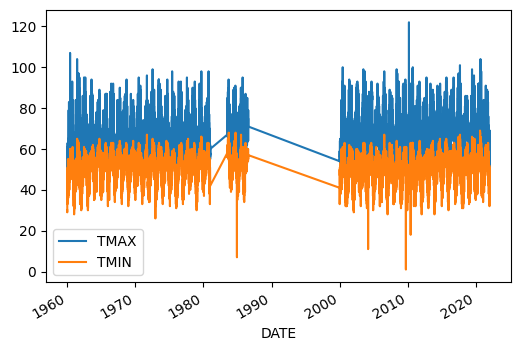

In [41]:
# Use pandas to plot the 'TMIN' and 'TMAX' columns
import matplotlib.pyplot as plt
%matplotlib inline

weather1[['TMAX', 'TMIN']].plot();

In [42]:
weather1.index.year.value_counts().sort_index()

1960    366
1961    365
1962    365
1963    365
1964    366
1965    365
1966    365
1967    365
1968    366
1969    365
1970    365
1971    365
1972    366
1973    365
1974    365
1975    365
1976    366
1977    365
1978    365
1979    365
1980    366
1983    184
1984    366
1985    365
1986    212
2000    365
2001    365
2002    365
2003    365
2004    366
2005    365
2006    365
2007    365
2008    366
2009    365
2010    365
2011    365
2012    365
2013    365
2014    365
2015    365
2016    366
2017    365
2018    365
2019    365
2020    366
2021    364
2022     28
Name: DATE, dtype: int64

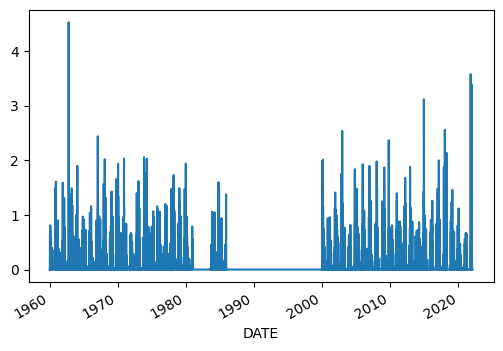

In [43]:
# Plot the precipitation over time
weather1['PRCP'].plot();

In [44]:
# Calculate precipitation by year, and plot it
weather1.groupby(weather1.index.year)['PRCP'].sum()

DATE
1960    14.01
1961    13.87
1962    22.47
1963    19.11
1964    16.83
1965    16.32
1966    13.11
1967    23.98
1968    17.19
1969    25.70
1970    25.31
1971    10.61
1972    16.27
1973    29.37
1974    16.87
1975    17.54
1976     8.64
1977    11.70
1978    22.57
1979    23.79
1980    13.58
1983     7.13
1984    16.03
1985     8.50
1986     0.00
2000    21.09
2001    22.84
2002    19.12
2003    11.37
2004    12.97
2005    27.37
2006    22.79
2007    12.79
2008    13.86
2009    14.57
2010    22.67
2011    16.06
2012    22.93
2013     4.89
2014    19.62
2015     8.58
2016    19.77
2017    23.34
2018    16.82
2019    20.00
2020     6.42
2021    20.82
2022     0.25
Name: PRCP, dtype: float64

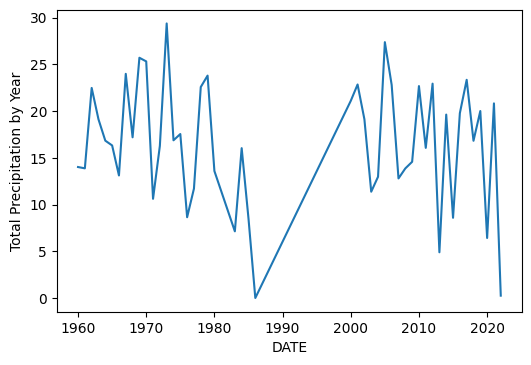

In [45]:
weather1.groupby(weather1.index.year)['PRCP'].sum().plot()
plt.ylabel('Total Precipitation by Year');

In [46]:
# Create a target column. This should be the maximum temperature for the next day
weather1['Target'] = weather1['TMAX'].shift(-1)

In [47]:
weather1

,PRCP,TMAX,TMIN,Target
DATE,,,,
1960-01-01,0.0,49.0,30.0,49.0
1960-01-02,0.0,49.0,29.0,54.0
1960-01-03,0.0,54.0,35.0,54.0
1960-01-04,0.0,54.0,36.0,55.0
1960-01-05,0.0,55.0,33.0,53.0
...,...,...,...,...
2022-01-24,0.0,60.0,39.0,57.0
2022-01-25,0.0,57.0,43.0,57.0
2022-01-26,0.0,57.0,41.0,67.0


In [48]:
# Remove the last row as it has a 'NaN' value in 'Target' column
weather1.drop(weather1.tail(1).index, inplace=True)

In [49]:
weather1

,PRCP,TMAX,TMIN,Target
DATE,,,,
1960-01-01,0.0,49.0,30.0,49.0
1960-01-02,0.0,49.0,29.0,54.0
1960-01-03,0.0,54.0,35.0,54.0
1960-01-04,0.0,54.0,36.0,55.0
1960-01-05,0.0,55.0,33.0,53.0
...,...,...,...,...
2022-01-23,0.0,60.0,41.0,60.0
2022-01-24,0.0,60.0,39.0,57.0
2022-01-25,0.0,57.0,43.0,57.0


In [50]:
# Initialize a Ridge Regression machine learning model
from sklearn.linear_model import Ridge
reg = Ridge(alpha=0.1)

In [51]:
predictors = ['PRCP', 'TMAX', 'TMIN']

In [52]:
# Split data
train = weather1.loc[:'2020-12-31']
test = weather1.loc['2021-01-01':]

In [53]:
print(train.shape)
print(test.shape)

(16467, 4)
(391, 4)


In [54]:
train.head()

,PRCP,TMAX,TMIN,Target
DATE,,,,
1960-01-01,0.0,49.0,30.0,49.0
1960-01-02,0.0,49.0,29.0,54.0
1960-01-03,0.0,54.0,35.0,54.0
1960-01-04,0.0,54.0,36.0,55.0
1960-01-05,0.0,55.0,33.0,53.0


In [55]:
test.head()

,PRCP,TMAX,TMIN,Target
DATE,,,,
2021-01-01,0.00,60.0,40.0,57.0
2021-01-02,0.14,57.0,51.0,56.0
2021-01-03,0.00,56.0,49.0,62.0
2021-01-04,0.36,62.0,46.0,59.0
2021-01-05,0.00,59.0,42.0,59.0


In [56]:
# Fit training data
model = reg.fit(train[predictors], train['Target'])

In [57]:
pred = model.predict(test[predictors])

In [58]:
# Performance Metric
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test['Target'], pred)
print(mse)

20.56066854811876


In [59]:
# Combining the predictions and actuals into a single DataFrame
dat = pd.concat([test['Target'], pd.Series(pred, index=test.index)], axis=1)
dat.columns = ['Actual Values', 'Prediction Values']

In [60]:
dat

,Actual Values,Prediction Values
DATE,,
2021-01-01,57.0,59.806024
2021-01-02,56.0,59.310181
2021-01-03,62.0,58.538685
2021-01-04,59.0,61.531814
2021-01-05,59.0,59.444266
...,...,...
2022-01-23,60.0,59.985714
2022-01-24,57.0,59.626333
2022-01-25,57.0,58.181680


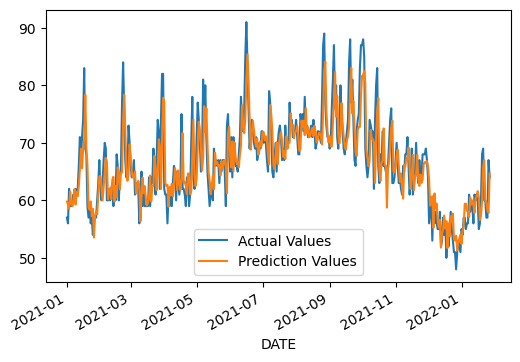

In [61]:
# Plot showing the actual temperature values and the predictions
dat.plot();

In [62]:
reg.coef_

array([-2.20730384,  0.72113834,  0.17969047])

In [63]:
# Add a column containing average temperature over the previous 30 days
weather1['TAVG'] = weather1['TMAX'].rolling(30).mean()

In [64]:
# Add in columns with the ratios between the average monthly temperature and the maximum and minimum temperature today
weather1['TMONTH_MAX'] = weather1['TAVG'] / weather1['TMAX']
weather1['MAX_MIN'] = weather1['TMAX'] / weather1['TMIN']

In [65]:
weather1 = weather1.iloc[30:, :].copy()

In [66]:
# Function to finish splitting the data, training a model, and making predictions
# Function returns a single DataFrame with both the predictions and the actual values
def predictions(predictors, weather1, reg):
    train = weather1.loc[:'2020-12-31']
    test = weather1.loc['2021-01-01':]
    
    model = reg.fit(train[predictors], train['Target'])
    predictions = model.predict(test[predictors])
    
    error = mean_squared_error(test['Target'], predictions)
    
    combined = pd.concat([test['Target'], pd.Series(predictions, index=test.index)], axis=1)
    combined.columns = ['Actual', 'Predictions']
    return error, combined

In [67]:
# Use function to train model and colculate error
predictors = ['PRCP', 'TMAX', 'TMIN', 'TMONTH_MAX', 'MAX_MIN']
error, combined = predictions(predictors, weather1, reg)
print(error)

20.170663808991097


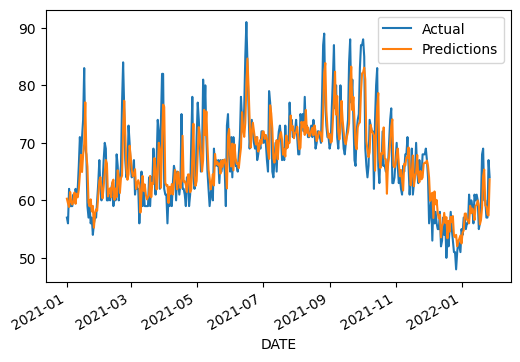

In [68]:
combined.plot();

In [69]:
# Add in average monthly temperature and average daily temperature columns. Only use data before the current year
weather1['Monthly_Avg'] = weather1['TMAX'].groupby(weather1.index.month).apply(lambda x: x.expanding(1).mean())
weather1['Day_of_year_avg'] = weather1['TMAX'].groupby(weather1.index.dayofyear).apply(lambda x: x.expanding(1).mean())

In [70]:
# Run the model again with updated predictors
error, combined = predictions(predictors + ['Monthly_Avg', 'Day_of_year_avg'], weather1, reg)
print(error)

19.37585052643261


In [71]:
reg.coef_

array([-1.07706522,  0.69350145,  0.04696919,  4.78060588,  0.07003167,
        0.16384976,  0.08581002])

In [72]:
# Correlation
weather1.corr()['Target']

PRCP              -0.205413
TMAX               0.821650
TMIN               0.596016
Target             1.000000
TAVG               0.686842
TMONTH_MAX        -0.421537
MAX_MIN            0.045228
Monthly_Avg        0.689805
Day_of_year_avg    0.712334
Name: Target, dtype: float64

In [73]:
# Difference between actual and predicted values
combined['Difference'] = (combined['Actual'] - combined['Predictions']).abs()

In [74]:
# Create a dataframe
combined.sort_values('Difference', ascending=False) 

,Actual,Predictions,Difference
DATE,,,
2021-01-17,83.0,68.433744,14.566256
2021-04-01,62.0,75.713379,13.713379
2021-05-07,81.0,67.678091,13.321909
2021-02-21,77.0,64.141065,12.858935
2021-10-16,66.0,78.707594,12.707594
...,...,...,...
2021-07-01,72.0,72.062010,0.062010
2021-02-23,76.0,75.938772,0.061228
2022-01-06,56.0,56.060552,0.060552
